In [1]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Data fetching
# Custom data fetcher to replace broken YahooDataProvider
# The qiskit-finance YahooDataProvider has compatibility issues with latest yfinance
import yfinance as yf

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# Portfolio parameters
# Data parameters
START_DATE = datetime.now() - timedelta(days=365*2)  # 2 years of data
END_DATE = datetime.now()

# S&P 500 stocks (diversified sector selection)
TICKERS = [
    # Technology
    'NVDA',  # NVIDIA
    'MSFT',  # Microsoft
    'AAPL',  # Apple
    'AMZN',  # Amazon
    'META',  # Meta
    'AVGO',  # Broadcom
    'GOOGL', # Alphabet
    'TSLA',  # Tesla
    'BRK-B', # Berkshire Hathaway
    'WMT',   # Walmart
]


print(f"Configuration:")
print(f"  Tickers: {TICKERS}")
print(f"  Date range: {START_DATE.date()} to {END_DATE.date()}")


Configuration:
  Tickers: ['NVDA', 'MSFT', 'AAPL', 'AMZN', 'META', 'AVGO', 'GOOGL', 'TSLA', 'BRK-B', 'WMT']
  Date range: 2023-10-21 to 2025-10-20


In [3]:
def fetch_stock_data(tickers, start_date, end_date):
    """
    Fetch stock data and compute returns, covariance, and correlation.
    
    Args:
        tickers: List of ticker symbols
        start_date: Start date
        end_date: End date
    
    Returns:
        mean_returns, covariance_matrix, correlation_matrix
    """
    print(f"Fetching data for {len(tickers)} stocks from Yahoo Finance...")
    
    # Download data
    data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False, progress=False)
    
    # Extract adjusted close prices
    if len(tickers) == 1:
        prices = data['Adj Close'].to_frame()
        prices.columns = tickers
    else:
        prices = data['Adj Close']
    
    # Drop any NaN values
    prices = prices.dropna()
    
    print(f"Downloaded {len(prices)} days of price data")
    
    # Calculate daily returns
    returns = prices.pct_change().dropna()
    
    # Calculate mean returns (daily)
    mean_returns = returns.mean().values
    
    # Calculate covariance matrix (daily)
    covariance_matrix = returns.cov().values

    
    return mean_returns, covariance_matrix, prices


# Fetch data
mean_returns, covariance_matrix, price_data = fetch_stock_data(
    TICKERS, START_DATE, END_DATE
)

print(f"\nData fetched successfully!")
print(f"Mean returns shape: {mean_returns.shape}")
print(f"Covariance matrix shape: {covariance_matrix.shape}")
print(f"\nMean returns (annualized):")
for i, ticker in enumerate(TICKERS):
    print(f"  {ticker}: {mean_returns[i]*252:.2%}")  # Annualized (252 trading days)

Fetching data for 10 stocks from Yahoo Finance...
Downloaded 499 days of price data

Data fetched successfully!
Mean returns shape: (10,)
Covariance matrix shape: (10, 10)

Mean returns (annualized):
  NVDA: 23.48%
  MSFT: 31.14%
  AAPL: 85.56%
  AMZN: 20.60%
  META: 36.22%
  AVGO: 48.64%
  GOOGL: 25.72%
  TSLA: 86.35%
  BRK-B: 56.64%
  WMT: 38.82%


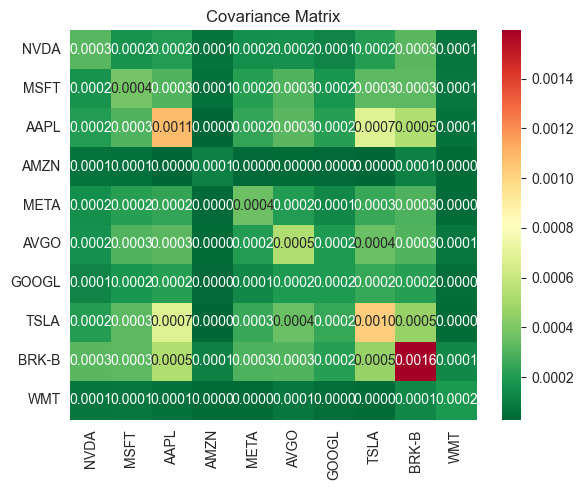

In [4]:
# Visualize covariance matrix - single plot version
plt.figure(figsize=(6, 5))

# Covariance matrix
sns.heatmap(covariance_matrix, annot=True, fmt='.4f', cmap='RdYlGn_r', 
            xticklabels=TICKERS, yticklabels=TICKERS)
plt.title('Covariance Matrix')


plt.tight_layout()
plt.show()